In [1]:
import numpy as np
import matplotlib.pylab as plt

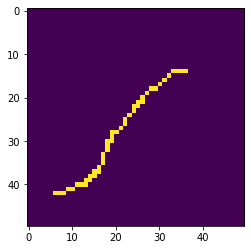

In [64]:
im = plt.imread("test.bmp")
im
imBnW = [[(0 if (x == [255, 255, 255, 255]).all() else 1) for x in y] for y in im]
plt.imshow(imBnW)

In [105]:
sample = []
for x in range(len(imBnW)):
    for y in range(len(imBnW[0])):
        if imBnW[x][y]==1:
            sample.append([x, y])
sample = np.array(sample)
sample

array([[14, 33],
       [14, 34],
       [14, 35],
       [14, 36],
       [15, 32],
       [16, 31],
       [17, 30],
       [18, 28],
       [18, 29],
       [19, 27],
       [20, 26],
       [21, 25],
       [21, 26],
       [22, 24],
       [22, 25],
       [23, 24],
       [24, 23],
       [25, 22],
       [26, 22],
       [27, 21],
       [28, 19],
       [28, 20],
       [29, 19],
       [30, 18],
       [30, 19],
       [31, 18],
       [32, 18],
       [33, 17],
       [34, 17],
       [35, 17],
       [36, 16],
       [37, 15],
       [37, 16],
       [38, 14],
       [38, 15],
       [39, 13],
       [39, 14],
       [40, 11],
       [40, 12],
       [40, 13],
       [41,  9],
       [41, 10],
       [42,  6],
       [42,  7],
       [42,  8]])

In [106]:
start = [42, 6]
end = [14, 36]
BP = np.array([start, [start[0]+(end[0]-start[0])/3.0, start[1]+(end[1]-start[1])/3.0], [start[0]+2*(end[0]-start[0])/3.0, start[1]+2*(end[1]-start[1])/3.0], end]) #start point and end point would be given by algo
BP

array([[42.        ,  6.        ],
       [32.66666667, 16.        ],
       [23.33333333, 26.        ],
       [14.        , 36.        ]])

In [107]:
def Bezier(points, num):
    res = []
    ts = np.linspace(0, 1, num)
    for t in ts:
        res.append(points[0]*(1-t)**3 + points[1]*3*t*(1-t)**2 + points[2]*3*(1-t)*t**2 + points[3]*t**3)
    return np.array(res)
def reOrder(points, bezier):
    p = points.tolist()
    rp = []
    cp = []
    for b in bezier:
        s = -1.0
        for pp in p:
            if s < 0 or np.linalg.norm(b-pp) < s:
                s = np.linalg.norm(b-pp)
                cp = pp
        rp.append(list(cp))
        p.remove(cp)
    return np.array(rp)
def Error(p1, p2):
    sum = 0
    for x in range(min(len(p1), len(p2))):
        sum += np.linalg.norm(p1[x]-p2[x])**2
    return sum

In [108]:
sample = reOrder(sample, Bezier(BP, len(sample)))
adjust = np.array([[[0, 0], [x%3-1, (x//3)%3-1], [(x//9)%3-1, (x//27)%3-1], [0, 0]] for x in range(81)])/2.0
doNext = True
print(BP)
while doNext:
    maxDiff = []
    currB = Bezier(BP, len(sample))
    err = Error(currB, sample)
    for a in adjust:
        newBP = BP + a
        newB = Bezier(newBP, len(sample))
        newErr = Error(newB, sample)
        #print(newErr)
        if err - newErr > 0.01:
            err = newErr
            maxDiff = a
    if len(maxDiff) != 0:
        BP = BP + maxDiff
    else:
        doNext = False
print(BP)

[[42.          6.        ]
 [32.66666667 16.        ]
 [23.33333333 26.        ]
 [14.         36.        ]]
[[42.          6.        ]
 [35.66666667 22.5       ]
 [17.33333333 21.        ]
 [14.         36.        ]]


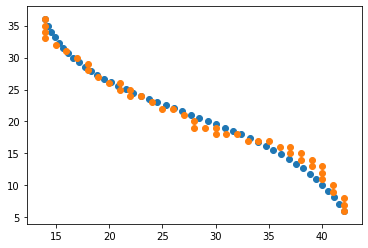

In [110]:
plt.scatter(Bezier(BP, len(sample))[:,0], Bezier(BP, len(sample))[:,1])
plt.scatter(sample[:,0], sample[:,1])

array([42, 42, 42, 41, 41, 40, 40, 39, 38, 37, 36, 37, 34, 33, 35, 32, 31,
       30, 30, 29, 28, 28, 27, 26, 25, 24, 23, 22, 22, 21, 21, 20, 19, 18,
       18, 17, 16, 15, 14, 14, 14, 14, 38, 39, 40])